# **Tobacco Use and Mortality**

In [ ]:
# Import required libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Load dataset
df = pd.read_csv("smokers.csv")

# Display dataset structure
print(df.info())  # Check data types and missing values
print(df.head())  # Preview first few rows

# Check for missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB
None
   Year      Method  Sex  16 and Over  16-24  25-34  35-49  50-59  60 and Over
0  1974  Unweighted  NaN           46     44     51     52     50           33
1  1976  Unweighted  NaN           42     42     45     48     48           30
2  1978  Unweighted  NaN           40     39     45     45     45           30
3  1980  Unweighted  NaN           39     37     46     44     45           

In [ ]:
# Fill missing values in 'Sex' column with 'Unknown'
df['Sex'].fillna('Unknown', inplace=True)

# Convert 'Year' column to integer for better plotting
df['Year'] = df['Year'].astype(int)

# Verify changes
print("Missing values after cleaning:\n", df.isnull().sum())
print(df.head())


Missing values after cleaning:
 Year           0
Method         0
Sex            0
16 and Over    0
16-24          0
25-34          0
35-49          0
50-59          0
60 and Over    0
dtype: int64
   Year      Method      Sex  16 and Over  16-24  25-34  35-49  50-59  \
0  1974  Unweighted  Unknown           46     44     51     52     50   
1  1976  Unweighted  Unknown           42     42     45     48     48   
2  1978  Unweighted  Unknown           40     39     45     45     45   
3  1980  Unweighted  Unknown           39     37     46     44     45   
4  1982  Unweighted  Unknown           35     35     38     39     41   

   60 and Over  
0           33  
1           30  
2           30  
3           29  
4           27  


<ipython-input-2-95e7b0f569f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna('Unknown', inplace=True)


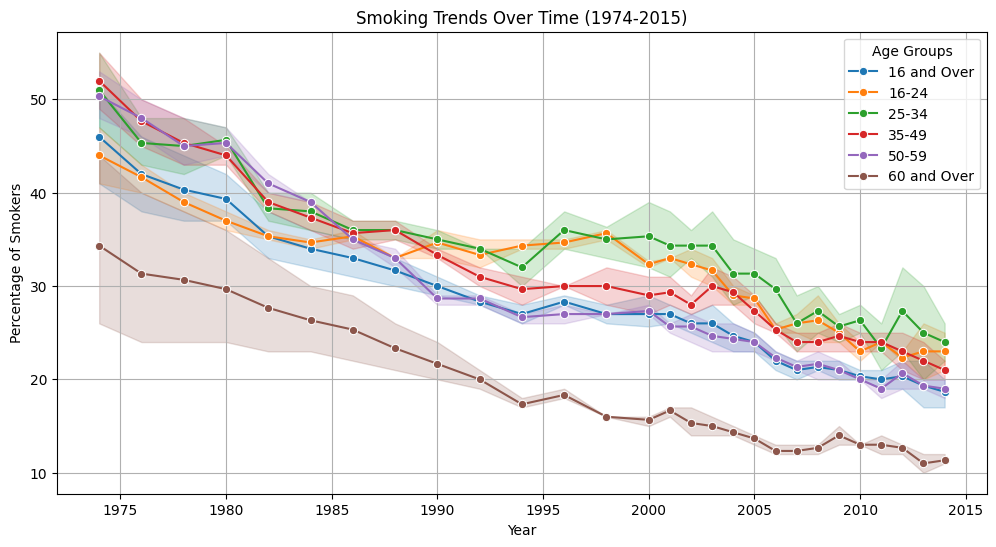

In [ ]:
plt.figure(figsize=(12,6))

# Line plots for different age groups
sns.lineplot(x='Year', y='16 and Over', data=df, marker='o', label="16 and Over")
sns.lineplot(x='Year', y='16-24', data=df, marker='o', label="16-24")
sns.lineplot(x='Year', y='25-34', data=df, marker='o', label="25-34")
sns.lineplot(x='Year', y='35-49', data=df, marker='o', label="35-49")
sns.lineplot(x='Year', y='50-59', data=df, marker='o', label="50-59")
sns.lineplot(x='Year', y='60 and Over', data=df, marker='o', label="60 and Over")

plt.title("Smoking Trends Over Time (1974-2015)")
plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")
plt.legend(title="Age Groups")
plt.grid()
plt.show()


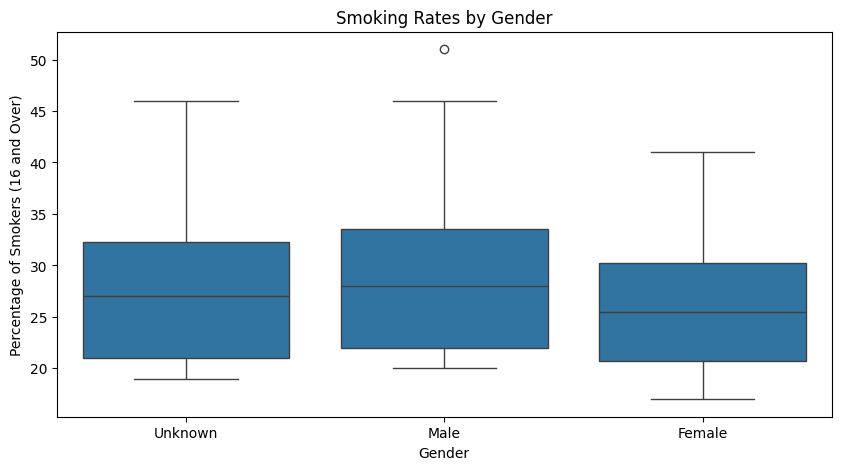

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sex', y='16 and Over', data=df)
plt.title("Smoking Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Smokers (16 and Over)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define Features (X) and Target (y)
X = df[['Year']]  # Using Year as predictor
y = df['16 and Over']  # Predicting overall smoking prevalence

# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1.541301820728293
R-Squared Score: 0.918654682603963
